In [ ]:
#!unzip "/content/drive/MyDrive/dog-breed-identification (1).zip" -d "/content/drive/MyDrive/"

# Dog breed identification

## Problem

Identify dog breeds

## Data

From Kaggle

## Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## Features

we're dealing with images (unstructured data) so it's probablt best we use deep learning / transfer learning.

There are 120 breeds of dogs and therefore 120 different classes.

There are around 10k images of dogs in training set.

There are around 10k images of dogs in test set

In [ ]:

import tensorflow as tf
print("TF version:", tf.__version__)
import tensorflow_hub as hub
print("TF Hub version", hub.__version__)

# check for GPU availability
print("GPU", "available (Yessss!)" if tf.config.list_physical_devices ("GPU") else "not available")

TF version: 2.13.0
TF Hub version 0.14.0
GPU available (Yessss!)


# getting out data ready

First, we will transform data into numeric format. Turn our images into tensors (matrix is a tensor)





In [ ]:
# let's start with checking out data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

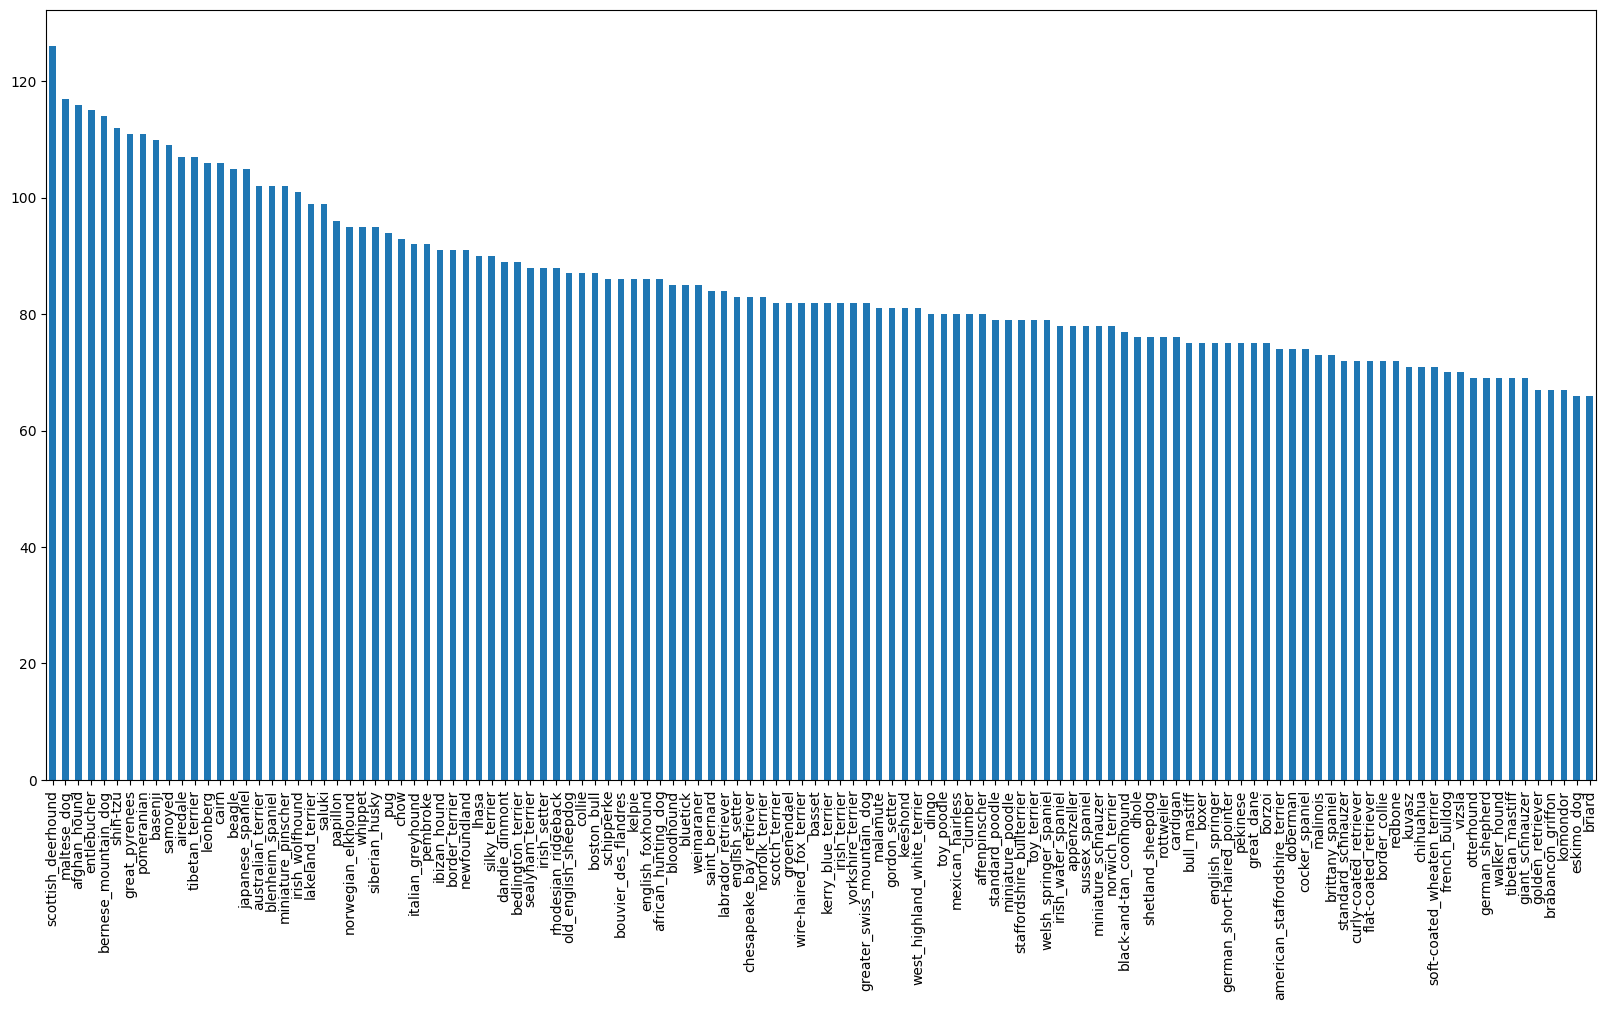

In [ ]:
# how many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
# we check the median, because we needs to see what the average number of images per dog breed is, because if we have
# 80 pics of one dog and three of another, model will be inbalanced and 3 pics isn't enough. Median better than
# using mean. Also, we can look at graph to see any major outliars. Google recomends at least 10 photos of one object
# for image recognition.
labels_csv["breed"].value_counts().median()

82.0

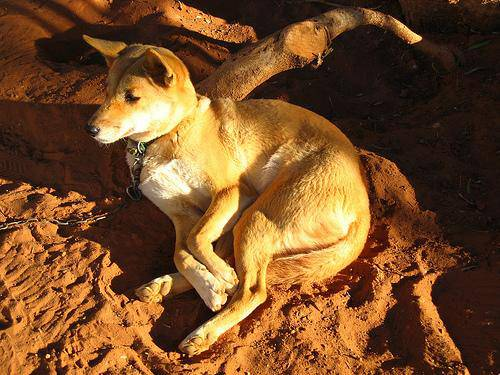

In [ ]:
# let's view an image
from IPython.display import Image
Image("drive/MyDrive/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
# let's get a list of image file path names
filenames = ["drive/MyDrive/train/" + fname + ".jpg" for fname in labels_csv["id"]] # this collates all file paths for images

filenames[:10] # check first ten just to check process ismworking, via list slicing

['drive/MyDrive/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether number of filenames = number of actual image files. We need to do this now. If left til later,
# will make our lives a lot harder!
import os
if len(os.listdir("drive/My Drive/train/")) == len(filenames):
  print("they match! proceed...")
else:
  print("filenames do not match amount of images!")

they match! proceed...


Now let's prepare our labels


In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("match!")
else:
  print("not a match!")

match!


In [ ]:
# fit the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# turn single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

# as you can see from code printed below, only prints true for boston_bull, which is unique

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# turn every label into boolean array
boolean_labels = [labels == unique_breeds for labels in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# turn boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array : arg max means max value , so it's saying print max value in array
print(boolean_labels[0].astype(int)) # there will be a 1 where sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

# Creating our own validation set, because kaggle doesn't provide us one

In [ ]:
# set up x and y
x = filenames
y = boolean_labels

len(filenames)

10222

we're going to start off experimenting with 1000 images and increase as needed, otherwise long winded waiting times

In [ ]:
# set up number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# let's split data into train and validation
from sklearn.model_selection import train_test_split

# split into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
len(x_train), len(y_train), len(x_val), len(y_val) # remember only 1000 total as NUM_IMAGES is smaller experiment

(800, 800, 200, 200)

In [ ]:
x_train[:2], y_train[:2] # this clarifies x is dog images and y is boolean yes/no

(['drive/MyDrive/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fa

# preprocessing images : turning images into tensors

to preprcoess our images, we're going to write a function that does a few things

1. take image filepath as input
2. use tenforflow to read the file and save it to an variable, `image`.
3. turn our `image` a jpg, into tensors
4. normalise our `image` : scale from 0,255(RGB) to between 0-1.
5. resize the `image` to be a shape of 224, 224.
6. return the modified `image`.

# before we do, let's see what importing an image looks like

In [ ]:
# convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()
# 255 is max and 0 is min RGB (red green blue) numbers / colours on spectrum

(255, 0)

In [ ]:
# convert to tensors. Now it's in tensor form, will run quicker as running off GPU and not CPU.
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [ ]:
# define image size, we use 224, 224 shape as that's what machine learning model we're using was trained on
IMG_SIZE = 224

# create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  # read in an image file
  image = tf.io.read_file(image_path)
  # turn jpg image into numerical tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channels from 0-255, to 0 to 1 values : normalise : feature normalization is a for of feature scaling
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize image to desired 244,244
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# turning our data into batches. Standard batch size is 32. Again, we split data in batches to save time. Also saves
# disk space, although we have GPU that's fast at loading, RAM, which deals with storing data, isn't as big.
# that's why it's standard to test 32 images at a time.


turning our data into batches. Standard batch size is 32. Again, we split data in batches to save time. Also saves disk space, although we have GPU that's fast at loading, RAM, which deals with storing data, isn't as big. That's why it's standard to test 32 images at a time.

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this: (image, label)


In [ ]:
# create a tuple of tensors
def get_image_label(image_path, labels):

  image = process_image(image_path)
  return image, labels

In [ ]:
# demo of the above, x = filename, y = boolean_labels
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way of turning our tuples into tensors, in the form `(image, label)`, let's make a function to turn all of our data `(x, y)` into batches.

In [ ]:
BATCH_SIZE = 32

# create function to turn data into batches

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data from images (x) and label (y) pairs.
  Shuffles the data if it's in the training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels for test data) (this is why we put y=None above)
  '''
  # if data is test data, we probably don't have labels
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths, no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if data is validation data, we don't need to shuffle it
  elif valid_data:
    print("creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batches")
    #Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))

    # shuffling file path names and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x)) # buffer size allows you to chose what gets shuffled,
    # here we decided all of X

    # create (images, labels) tuples (this also turns image path into a preprocessed image)
    data = data.map(get_image_label)

    # turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
# creating training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)


creating training data batches
creating validation data batches


In [ ]:
# check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# the reason it says None inside brackets above is because batch size is changeable

# Visualising data batches

Our data is now in batches, however, these can be a little hard to understand, let's visualise them!

In [ ]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(image, labels):
  '''
  displays a plot of 25 images and their labels from data batch
  '''
  # set up the figure
  plt.figure(figsize=(10,10))
  # loop through 25 images
  for i in range(25):
    # create subplots((5 rows, 5 columns, index +=))
    ax = plt.subplot(5, 5, i+1)
    # display image
    plt.imshow(image[i])
    # add the images label as a title
    plt.title(unique_breeds[labels[i].argmax()])
    # this gets rid of grid lines that get in way of images if line below isn't included
    plt.axis("off")


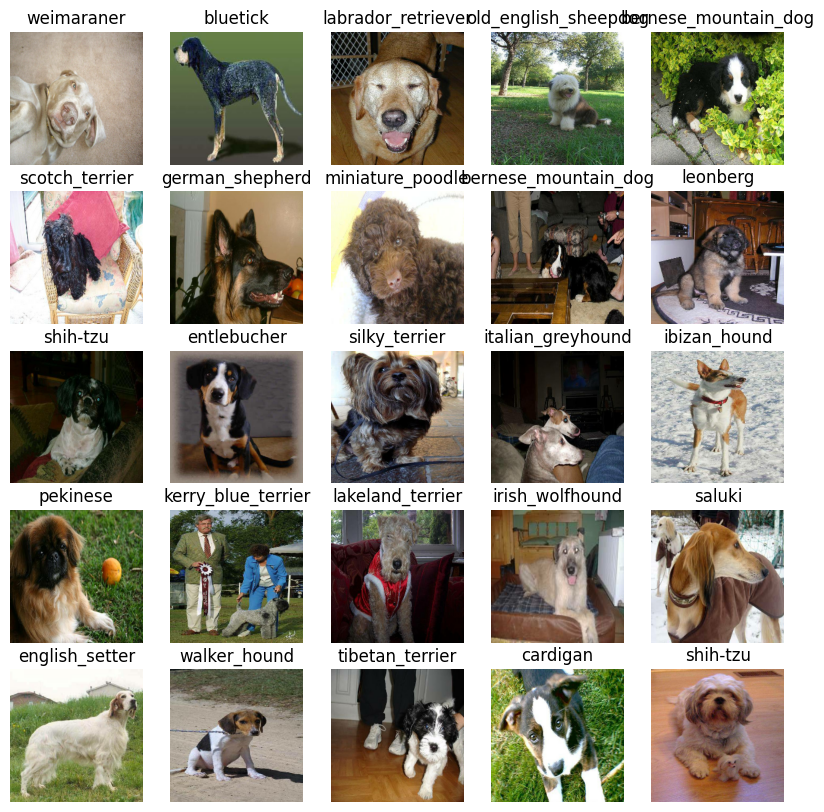

In [ ]:
# we have to unbatch data to visualise it
train_images, train_labels = next(train_data.as_numpy_iterator()) # this code converts batches back to numpy arrays
# now let's visualise the data in a training batch
show_25_images(train_images, train_labels)

# Building a model

Before we build a model, there's a few things we need to define:

- The input shape (our images shape, in the form of tensors) to our model.
- The output shape (image labels, in the form of tensors) of our moodel.
- The URL of model we want to use (this is where we use tensorflow hub to import transfer learning model, aka model that already exists, and we build upon that to build our model).

In [ ]:
IMG_SIZE

224

In [ ]:
# set up input shape to model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels 3 = RGB

# set up output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# set up model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5" # from tensorflow hub, transfer learning model, using MobileNet

# Keras deep learning model

Now we've loaded transfer learning model, let's use Keras sequential model as opposed to Keras Functional API, to build our model.


Let's create a function that:
- Takes input shape, output shape and the model we've chosen as parameters

- Defines the layers in a Keras model in sequential fashion (do this first , then this, then that).

- Compiles the model (says how it should be evaluated and improved)

- Builds the model (tells the model the input shape it'll be getting)

- Returns the model

All of the steps above can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# create a funtion which builds a Keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("building model with:", MODEL_URL)

  # set up the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # layer 1, input layer
    tf.keras.layers.Dense(units = OUTPUT_SHAPE, # this is saying use output shape of 120 breeds as transfer learning model changed dimensions to 1280
                          activation = "softmax") # layer 2, output layer, softmax function takes as input a vector of real numbers and normalizes it
    # into a probability distribution consisting of values between 0 and 1
])

  # compile the model
  model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), # the lower the loss , the better model is doing, want steep curve descending down, this signfies
     # predictions are doing well as less errors
    optimizer = tf.keras.optimizers.Adam(), # Adam optimizer is famoud optimizer known for being good on ML models
    metrics = ["accuracy"] # this tells us how well model is doing
)

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary() # TF website says the transfer learning model we're using was based off millions of images from imagenet website.
# the param # numbers below are based off original model patterns, then number below is our 120k images.

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


# creating callbacks - prevents overfitting

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBaord which helps track our models progress and another for stopping early which prevents it from training for too long!

Remember overfitting is when training sets outperform test set dramatically, which is a result of test set leaking into training set. Analogy: if you prepare for test ny tsicking to examples too much instead of taking the general idea and applying concepts to other problems

## TensorBoard Callback

To set up TensorBoard callback we need to do 3 things:

- Load the tensorboard notebook extension

- Create a TensorBoard callback which is able to save logs to a directory and pass it through our models `fit()` function

- Visualise our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
# load tensorbaord extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a TensorBoard Callback
def create_tensorboard_callback():
  # create a log directory for storing TensorBoard logs, here on google colab folders
  # I create new folder called 'logs' to save into
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # make it so logs get tracked every time we do experiment with date and time
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # year, month, day, hours, mins, seconds

  return tf.keras.callbacks.TensorBoard(logdir)


# Early stopping callback

Early stopping helps our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/guide/keras/writing_your_own_callbacks

In [ ]:

# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

# Training our model (on subset of data)

Our first model is only going to train 1000 images, to save time whilst we check everything is working

In [ ]:
NUM_EPOCHS = 100 # epochs is number of passes of data we'd like model to do, a pass is at attempt of the model
# trying to find a pattern in each dog image, and seeing which patterns relate to each label

In [ ]:
# check to see we're still running GPU or else will take considerable amount of time to train model as GPU is 30 x faster.
print("GPU", "available (Yes!)" if tf.config.list_physical_devices("GPU")  else ("not available"))

GPU available (Yes!)


# Let's create a function which trains a model

- create model using `create_model`
- Set up TensorBoard callback using `create_tensorboard_callback()`
- Call the `fit` function on our model passing it the training data, validation data, number of epochs to train for `(NUM_EPOCHS)` and the callbacks we'd like to use
Return the model

In [ ]:
#build a function to train and return a trained model
def train_model():
  # create model
  model = create_model()
  # create tensorboard session every time we train model
  tensorboard = create_tensorboard_callback()
  # fit model to data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 173s 6s/step - loss: 4.5960 - accuracy: 0.0887 - val_loss: 3.4167 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 3s 107ms/step - loss: 1.6478 - accuracy: 0.6725 - val_loss: 2.1279 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 3s 122ms/step - loss: 0.5645 - accuracy: 0.9388 - val_loss: 1.6482 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 4s 168ms/step - loss: 0.2507 - accuracy: 0.9862 - val_loss: 1.4802 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 3s 102ms/step - loss: 0.1485 - accuracy: 0.9950 - val_loss: 1.3914 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 3s 100ms/step - loss: 0.1007 - accuracy: 0.9975 - val_loss: 1.3557 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================]

**Question: It looks like our model is overfitting because it's performing far better on training dataset than val dataset, what are some ways to prevent overfitting with deep neural networks?

**Note: overfitting at first canbe a good thing because it means our model is learning!!

# checking the tensorboard logs

The TensorBoard magic function `%tensorboard` will access the logs directory we created earlier and visualise its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs # backslash represents space

#Making and evaluating predictions using a trained model





In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 5s 116ms/step


array([[1.49673084e-03, 4.09907574e-04, 8.73453543e-03, ...,
        1.27916603e-04, 1.20854493e-04, 4.61865915e-03],
       [4.46835998e-03, 1.10023061e-03, 1.22104362e-02, ...,
        6.42740633e-04, 3.07967421e-03, 2.08277852e-04],
       [6.83492763e-05, 1.25279228e-04, 2.39399975e-04, ...,
        2.09160542e-04, 5.57462299e-05, 1.12378912e-03],
       ...,
       [6.22647531e-06, 8.39724962e-05, 7.72642743e-05, ...,
        1.08611130e-05, 1.02645245e-04, 2.75275997e-05],
       [2.68736319e-03, 2.39073634e-04, 3.23274027e-04, ...,
        6.42000014e-05, 1.17891941e-04, 1.32091064e-02],
       [3.87841865e-04, 9.38047713e-04, 2.03063304e-04, ...,
        6.18687691e-03, 1.40431931e-03, 5.50845798e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

array above, added all together numbers = 1, but computer is very precise and never really adds to 1, so will more likely read 0.99, but in this case, as shown below, does =1 (can ever be just over 1 in some cases). The numbers in array above that = 1 or close to 1, are probability of 120 numbers (one for each dog breed) that the photo is that specific breed. So it's 120 numbers in each array, and each number in the array is a probability that that breed is breed in photo in question. And there is 200 of these arrays within this data batch we're testing, as shown in predictions.shape. These arrays only change into these probabilites as a result of us earlier implementing `softmax`. These predictions in arrays are also known as 'confidence intervals'

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
# first prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediciton): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.4967308e-03 4.0990757e-04 8.7345354e-03 2.3277746e-05 7.3295872e-04
 1.3502926e-04 1.2874715e-01 2.9799307e-04 8.6533764e-05 5.0813827e-04
 5.6688325e-04 1.5859336e-03 2.9635840e-04 1.1534122e-04 7.3259464e-04
 3.4479809e-04 6.9383814e-06 1.8009518e-01 5.6333840e-05 5.1641127e-05
 1.1257259e-03 1.4079399e-04 3.1517440e-05 6.0863183e-03 2.7219166e-05
 5.2315200e-04 2.0110200e-01 3.9892615e-04 1.4445634e-03 1.2426063e-03
 2.0426030e-05 4.1118632e-03 7.5834576e-04 3.1261094e-04 8.4078223e-05
 2.3156296e-02 5.4054235e-05 1.7726553e-03 2.6982257e-04 1.6322127e-04
 4.7382298e-03 6.0393486e-05 3.4613605e-04 6.1070023e-05 1.8872228e-04
 4.0481664e-05 7.2660412e-05 6.6644809e-04 2.5096416e-04 1.3072422e-04
 1.4584724e-04 2.7869857e-05 6.9758890e-04 2.9546476e-04 2.0867540e-04
 5.9828482e-05 5.2879611e-04 3.6959078e-03 8.9584745e-04 4.0698394e-02
 2.2188628e-04 5.5630768e-05 2.6990070e-03 1.1695770e-05 5.6509284e-04
 3.3548594e-02 4.5099401e-05 3.7934034e-04 8.5096108e-03 1.3907674e-04
 6.484

# Transform data to text

having the ABOVE data is great but we want to scale it.

If possible we also want photo of dog to appear with prediction

In [ ]:
# turn pred probabilities into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)] # returns highest prob, which is prediction

# get a predicted label based on index we choose
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Our validation data is still in batch dataset, so we have to unbatch it to make predictions on validation images and then cimparee those predictions to validation labels (truth labels)


In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a function to unbatch batched data
def unbatchify(data):
  images = []
  labels = []
  # loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# unbatchify validation set
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels[0])


'affenpinscher'

In [ ]:
get_pred_label(predictions[0]) # here we see if predicted border terrier but was cairn, so prediction is wrong!

'cairn'

# Visualising model predictions

We'll create a function which:
- Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
- Convert the prediction probabilities to a prediction label
- Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  view prediction, ground truth and image for sample n
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change colour of title depeding on whether prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  # change plot title to be predicted, probability of prediction and truth label
  plt.title("{}, {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                     color = color)

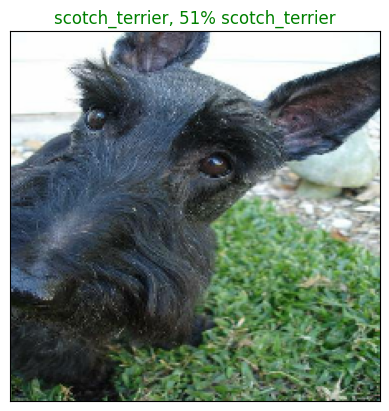

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images)

now we've got a function to visualise dog pics with models prediction and actual label, let's now make a function to visualise top 10 predictions for each image

this function will:
- take an input of prediction probabilities array and a ground truth array and an integer
- find a prediction using `get_pred_label`
- find the top 10:
  - predictions probabilities indexes
  - prediction probabilities values
  - prediction labels

- plot the top 10 prediction probability values and labels, colouring true labels green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  # find top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # set up plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  # chnage colour of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

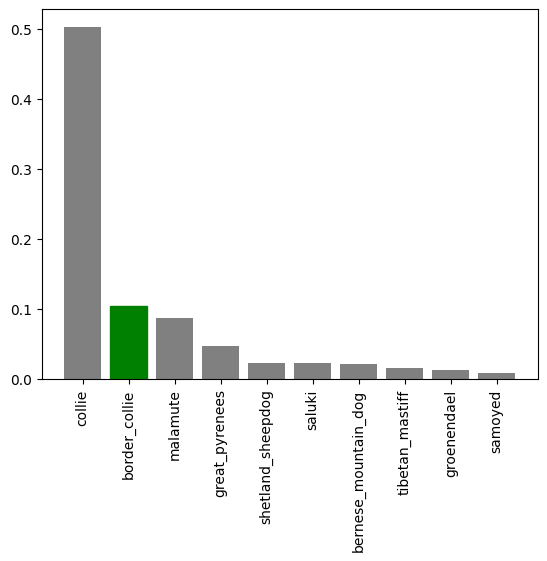

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9) # graph below shows what model predicted breed would be , the bigger, the higher (so it predicted collie),
               # then green one is label and actual breed (border collie)

now we've got some function to help us visualise our predictions and evaluate our models, let's check out a few predictions and their different values

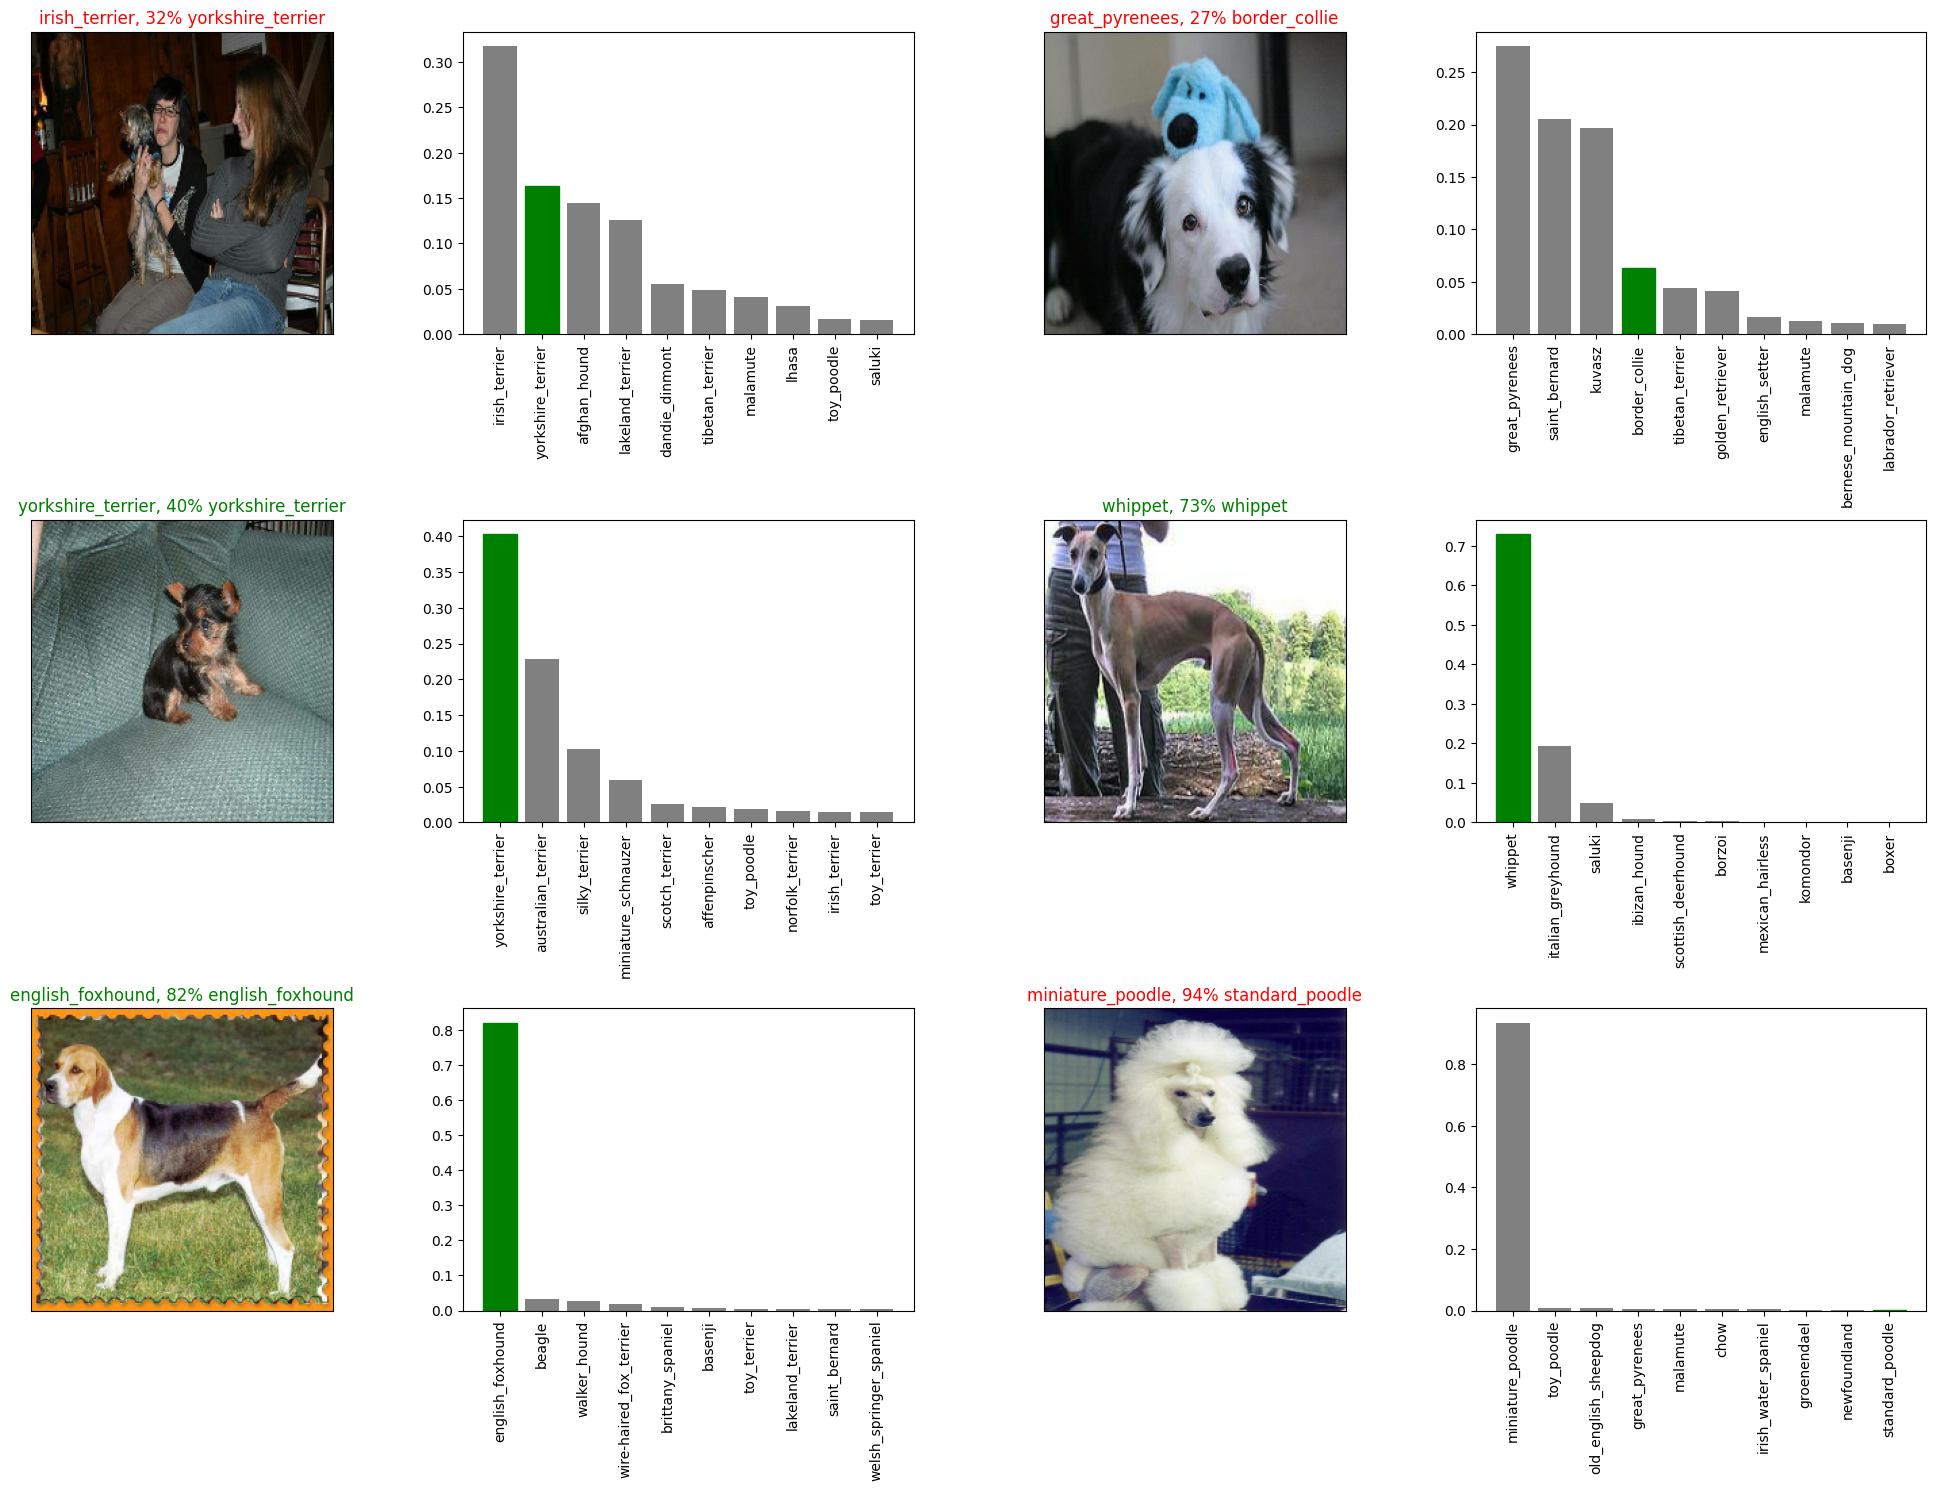

In [ ]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10 * num_cols, 5 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i + i_multiplier)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0) # helps adjust layout and gives more space as layout wasn't nice before
plt.show() # remember to always plot plt.show outside loop

challenge: how would you make confusion matrix with our models predictions and true labels?


Now we're going to save and load trained models so that we don't have to reload them even if google colab times out

In [ ]:
# create function to save model
def save_model(model, suffix=None):
  '''
  saves a given model in our newly created model directory and append a suffix(string)
  '''
  # create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # h5 is extension we use to save model
  print(f"saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# create a function to load a saved model
def load_model(model_path):
  print(f"loading a saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# now we've got functions to save and load models, let's make sure they work!


In [ ]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

saving model to: drive/My Drive/Dog Vision/models/20230913-15561694620561-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/models/20230913-15561694620561-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# load saved model
loaded_1000_image_model = load_model("/content/drive/MyDrive/Dog Vision/models/20230913-14131694614380-1000-images-mobilenetv2-Adam.h5")

loading a saved model from: /content/drive/MyDrive/Dog Vision/models/20230913-14131694614380-1000-images-mobilenetv2-Adam.h5


In [ ]:
# now loaded, lets double check loaded model is same as pre saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 69ms/step - loss: 1.2788 - accuracy: 0.6450


[1.2788316011428833, 0.6449999809265137]

In [ ]:
# now compare with loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 74ms/step - loss: 1.2797 - accuracy: 0.6750


[1.279680609703064, 0.675000011920929]

we can see above numbers, analysing model and it's performance align, thererfore we can now be certain the saved and loaded model is same as original model that we intended to save

# Training full model

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
# create data batch with full training set, using all functions we made to now make life much easier!
full_data = create_data_batches(x,y)

creating training data batches


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a model for full model
full_model = create_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training full model, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience = 3)

In [ ]:
# fit full model
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS, # which = 100 as earlier assigned when we made original function
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 36s 95ms/step - loss: 1.3490 - accuracy: 0.6667
Epoch 2/100
320/320 [==============================] - 28s 89ms/step - loss: 0.4037 - accuracy: 0.8814
Epoch 3/100
320/320 [==============================] - 29s 91ms/step - loss: 0.2399 - accuracy: 0.9347
Epoch 4/100
320/320 [==============================] - 29s 90ms/step - loss: 0.1543 - accuracy: 0.9640
Epoch 5/100
320/320 [==============================] - 29s 89ms/step - loss: 0.1077 - accuracy: 0.9782
Epoch 6/100
320/320 [==============================] - 28s 89ms/step - loss: 0.0778 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 28s 87ms/step - loss: 0.0589 - accuracy: 0.9922
Epoch 8/100
320/320 [==============================] - 28s 89ms/step - loss: 0.0474 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 28s 88ms/step - loss: 0.0371 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 29s 89ms/step - l

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

saving model to: drive/My Drive/Dog Vision/models/20230913-17521694627556-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/models/20230913-17521694627556-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# load in full model
loaded_full_model = load_model("/content/drive/MyDrive/Dog Vision/models/20230913-17031694624631-full-image-set-mobilenetv2-Adam.h5")

loading a saved model from: /content/drive/MyDrive/Dog Vision/models/20230913-17031694624631-full-image-set-mobilenetv2-Adam.h5


# making predictions on our test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily, we earlier created `save_data_batches()` which can take a list of filenames as inputs and convert them into Tensor batches.

To make predictions on the test data, we'll:
- Get the test image filenames
- Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` since the test data doesn't have labels
- Make a predictions array by passing the test batches to the `predict()` method called on our model

In [ ]:
# load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e743bea73da2c0dab99ccdbc697b1ac8.jpg',
 'drive/MyDrive/Dog Vision/test/e4369279919beecfb6d91a5375bc122f.jpg',
 'drive/MyDrive/Dog Vision/test/dd6ef59cad61882fec54f4b6a429065e.jpg',
 'drive/MyDrive/Dog Vision/test/e6223aba45a94c9ac349967ed946d0f7.jpg',
 'drive/MyDrive/Dog Vision/test/e7340d1efa70bf6d6c134e1e150f9473.jpg',
 'drive/MyDrive/Dog Vision/test/dd7fbb397a4968d9ae54d1d7b7a35ae6.jpg',
 'drive/MyDrive/Dog Vision/test/e0ccfbe350e0e8bc7bb7e1f95fa07b3b.jpg',
 'drive/MyDrive/Dog Vision/test/dda9df5ec2de82082127c99052fd077b.jpg',
 'drive/MyDrive/Dog Vision/test/e4c49d7e028965d3504b0862633464c3.jpg',
 'drive/MyDrive/Dog Vision/test/dfa54e85c1309d8a9933deedc1d775c7.jpg']

In [ ]:
# create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                              verbose = 1)

324/324 [==============================] - 247s 726ms/step


In [ ]:
# save preds (NumPy array) to CSV file (for access later)
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter = ",")

In [ ]:
# load predictions (NumPy array) for CSV file
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter = ",")

In [ ]:
test_predictions[:10]

array([[9.51341545e-13, 3.37146570e-13, 1.78849002e-09, ...,
        1.51157131e-08, 2.52310315e-06, 5.68285898e-08],
       [2.19306003e-05, 1.18627462e-07, 1.11353282e-09, ...,
        4.59083118e-08, 8.82372842e-06, 3.28836068e-05],
       [4.78522111e-07, 2.30147101e-08, 4.33521830e-10, ...,
        5.91202434e-11, 3.62444452e-09, 1.65353256e-07],
       ...,
       [8.91586606e-05, 5.27638289e-09, 1.24233930e-08, ...,
        2.52213184e-09, 4.14963142e-06, 4.58941184e-04],
       [3.21129301e-09, 1.77417503e-09, 1.10840373e-12, ...,
        1.82636176e-12, 3.57239998e-08, 8.93563126e-08],
       [6.12762960e-06, 8.53929521e-07, 1.05796294e-09, ...,
        3.16600163e-10, 6.37874809e-10, 1.27618094e-09]])

In [ ]:
test_predictions.shape

(10357, 120)

# Preparing test data for Kaggle (as kaggle competition requires data in specific format)

To get data in right format we must:

- create pandas DF with ID column, as well as column for each dog breed
- Add data to the ID column by extracting the test image IDs from their filepaths.
- Add data (the prediction probabilities) to each of the dog breed columns
- Export the DF as a CSV to submit it to Kaggle

In [ ]:
# create pandas DF with empty columns
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# append test IDs to predictions DF
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)] # splits ID by extracting ID and we index 0
# to get rid of 'jpg' string , now it's ready to add to DF
test_ids[:5]

['e743bea73da2c0dab99ccdbc697b1ac8',
 'e4369279919beecfb6d91a5375bc122f',
 'dd6ef59cad61882fec54f4b6a429065e',
 'e6223aba45a94c9ac349967ed946d0f7',
 'e7340d1efa70bf6d6c134e1e150f9473']

In [ ]:
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e743bea73da2c0dab99ccdbc697b1ac8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e4369279919beecfb6d91a5375bc122f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dd6ef59cad61882fec54f4b6a429065e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e6223aba45a94c9ac349967ed946d0f7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e7340d1efa70bf6d6c134e1e150f9473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# add predictions probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e743bea73da2c0dab99ccdbc697b1ac8,9.513415e-13,3.371466e-13,1.788490e-09,4.217247e-13,2.659719e-09,1.116932e-07,2.236667e-10,4.253293e-05,1.238448e-11,...,1.931449e-12,1.562651e-07,4.204654e-09,3.336183e-08,8.063602e-10,8.534659e-08,7.125580e-11,1.511571e-08,2.523103e-06,5.682859e-08
1,e4369279919beecfb6d91a5375bc122f,2.193060e-05,1.186275e-07,1.113533e-09,9.737394e-13,7.522493e-06,2.699868e-10,8.035004e-07,6.721774e-07,2.747246e-08,...,1.376584e-02,7.589410e-05,1.390534e-07,6.609495e-07,1.225170e-07,7.633179e-09,5.657318e-01,4.590831e-08,8.823728e-06,3.288361e-05
2,dd6ef59cad61882fec54f4b6a429065e,4.785221e-07,2.301471e-08,4.335218e-10,1.358420e-10,6.348980e-12,4.895271e-11,1.048620e-11,2.745549e-10,4.079647e-12,...,1.542262e-07,4.237362e-10,1.274226e-12,1.266374e-11,1.777697e-11,1.147116e-10,6.902731e-10,5.912024e-11,3.624445e-09,1.653533e-07
3,e6223aba45a94c9ac349967ed946d0f7,1.573841e-07,2.036867e-06,4.392095e-08,3.336615e-09,9.689387e-09,5.078626e-09,2.619746e-07,8.700400e-09,3.727391e-10,...,1.090532e-08,1.203859e-09,9.628826e-10,6.700911e-09,6.509374e-07,5.531400e-08,2.329875e-09,1.254435e-06,2.361159e-09,7.647825e-08
4,e7340d1efa70bf6d6c134e1e150f9473,3.484917e-10,2.463544e-07,4.061076e-10,4.062240e-07,2.956315e-09,3.498619e-05,1.679336e-11,7.387878e-10,1.472831e-10,...,5.933428e-10,2.049778e-11,2.485482e-09,3.892990e-06,2.083883e-09,4.615259e-10,1.730472e-10,6.817960e-06,1.159795e-11,2.262573e-09


In [ ]:
# save our predictions DF to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predicitons_submission_1_mobilenetV2.csv",
                index = False)

In [ ]:
from google.colab import files

# Specify the file path
file_path = 'drive/My Drive/Dog Vision/full_model_predicitons_submission_1_mobilenetV2.csv'  # Replace with your file path

# Use files.download() to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# make predictions on custom images

- get filepaths of images (I've created new folder for this `my-dog-photos`)
- Turn filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set `test_data` parameter to `True`
- Pass the custom image data batch to our models `predict()` method.
- convert the prediction output probabilities to prediciton labels
- compare the predicted labels to the custom images

In [ ]:
# get custom image path
custom_path = "drive/My Drive/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/My Drive/Dog Vision/my-dog-photos/dog3.JPG']

In [ ]:
# turn custom images into batch data set
custom_data = create_data_batches(custom_image_paths, test_data = True) # as my custom photo has no labels, we have
# to pass it through like it's test data
custom_data

Creating test data batches


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make predicitons on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 45ms/step


In [ ]:
custom_preds

array([[1.14747563e-08, 6.01057693e-08, 5.69975289e-10, 3.71562697e-10,
        1.75517141e-06, 2.03870688e-11, 6.13604882e-08, 1.67409442e-09,
        9.89646765e-08, 3.44822126e-08, 1.51613631e-06, 8.40385428e-10,
        2.26237802e-08, 3.72706865e-10, 2.00030636e-09, 2.35981162e-07,
        1.03327045e-06, 4.62224625e-06, 9.49067456e-08, 6.83486184e-11,
        2.17675045e-11, 1.24787718e-08, 1.53217009e-10, 1.32803091e-09,
        1.16121825e-07, 3.81342204e-07, 1.35275062e-08, 1.15177066e-07,
        1.96040162e-07, 1.40985196e-06, 4.59283811e-09, 1.20276133e-09,
        5.87163086e-05, 3.73503362e-09, 9.30249826e-07, 9.94596583e-09,
        2.54975846e-10, 2.81565948e-09, 6.30636212e-12, 5.37725864e-09,
        1.99785518e-05, 2.47851677e-08, 8.48654054e-07, 3.83276910e-10,
        3.52322859e-05, 8.13272383e-09, 9.65978686e-12, 1.10569918e-08,
        5.78172603e-08, 9.95564759e-01, 2.15567695e-07, 1.63180594e-05,
        3.65614845e-08, 2.93961255e-09, 3.93964267e-13, 2.235380

In [ ]:
custom_preds.shape

(1, 120)

In [ ]:
# get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['golden_retriever']

In [ ]:
# get custom images (our unbatchify won't work since there aren't any labels...maybe we could fix this later)
custom_images = []
# loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)